# **ABT 182 - Lab 4 Demo: Python Functions & Data Visualization**

## **Creating Functions and Professional Plots**

This demo notebook demonstrates:
- How to create reusable Python functions
- Professional line plots with custom styling
- Bar charts with color gradients
- Scatter plots for GIS data
- Heatmaps for spatial analysis

**Note:** All data used in this demo is **synthetic** and generated for demonstration purposes only. It does not represent real-world measurements or observations.

**Focus:** Modern, professional visualizations with carefully selected color schemes and styling

In [11]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import os

# Enable inline plotting for Jupyter/Colab
%matplotlib inline

# Set style for professional plots
plt.style.use('seaborn-v0_8-whitegrid')
# Ensure white background for all figures
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Create Images directory if it doesn't exist
images_dir = 'Images'
os.makedirs(images_dir, exist_ok=True)
print(f"Images will be saved to: {os.path.abspath(images_dir)}")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

Images will be saved to: c:\mnarimani\1-UCDavis\9-Github\ABT182_Advance_GIS_UCDavis\code\colab\Week4\Demo\Images
Libraries imported successfully!
NumPy version: 1.26.4
Matplotlib version: 3.10.1


## Step 1: Temperature Conversion Function

Create a reusable function to convert Fahrenheit to Celsius with professional visualization

In [12]:
def fahr2cels(temperature_f):
    '''
    Convert Fahrenheit to Celsius temperature.
    
    Parameters:
        temperature_f: Temperature in Fahrenheit (float or array)
    
    Returns:
        Temperature in Celsius (float or array)
    '''
    temperature_c = (temperature_f - 32) * 5 / 9
    return temperature_c

# Test the function
fahrenheit_temps = np.array([32, 50, 68, 86, 104, 122])
celsius_temps = fahr2cels(fahrenheit_temps)

print("Temperature Conversion:")
for f, c in zip(fahrenheit_temps, celsius_temps):
    print(f"{f}°F = {c:.1f}°C")

Temperature Conversion:
32°F = 0.0°C
50°F = 10.0°C
68°F = 20.0°C
86°F = 30.0°C
104°F = 40.0°C
122°F = 50.0°C


## Step 2: Line Plot with Gradient Colors

Create a professional line plot showing temperature trends over time

**Note:** The data used in this demo is synthetic and generated for demonstration purposes only.

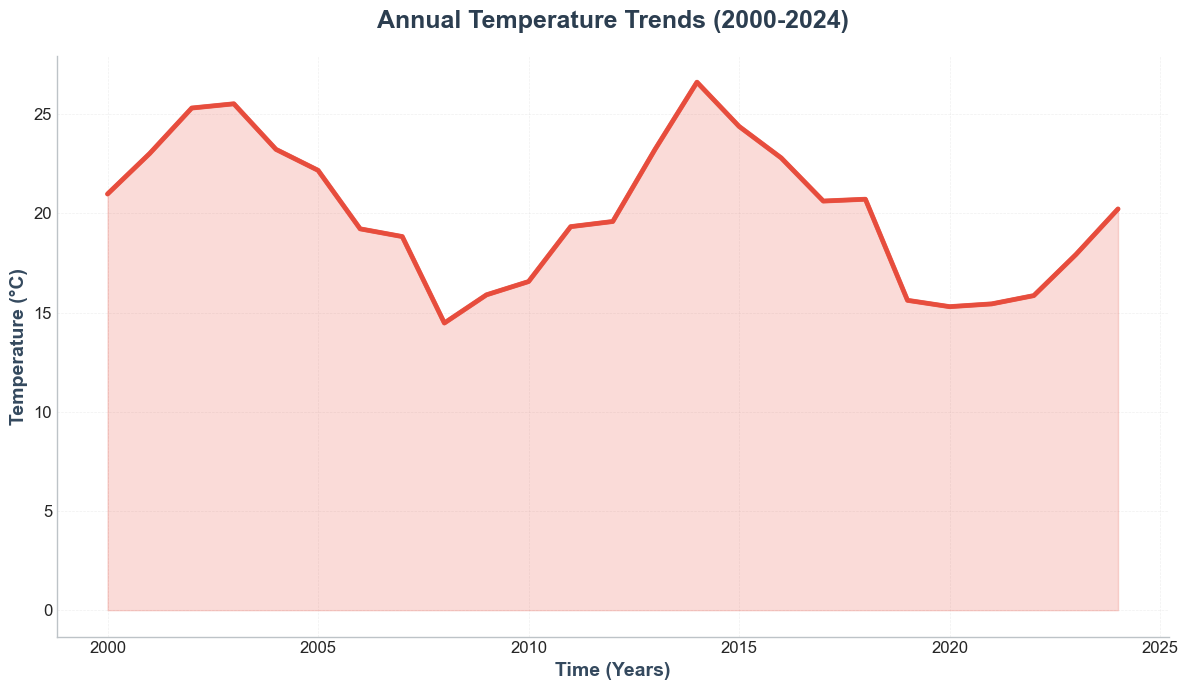

In [13]:
def plot_professional_line(x, y, title="Temperature Trend Analysis", color='#FF6B6B', linestyle='-', linewidth=3, alpha=0.8):
    '''
    Create a professional line plot with modern styling.
    
    Parameters:
        x: Array of x values
        y: Array of y values
        title: Plot title
        color: Line color (hex code)
        linestyle: Line style
        linewidth: Line width
        alpha: Transparency
    '''
    fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')
    ax.set_facecolor('white')
    
    # Create gradient effect using multiple lines
    for i in range(5):
        ax.plot(x, y, color=color, linestyle=linestyle, 
                linewidth=linewidth-i*0.3, alpha=alpha-i*0.1, zorder=5-i)
    
    # Add fill under the curve
    ax.fill_between(x, y, alpha=0.2, color=color)
    
    # Styling
    ax.set_title(title, fontsize=18, fontweight='bold', pad=20, color='#2C3E50')
    ax.set_xlabel('Time (Years)', fontsize=14, fontweight='bold', color='#34495E')
    ax.set_ylabel('Temperature (°C)', fontsize=14, fontweight='bold', color='#34495E')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#BDC3C7')
    ax.spines['bottom'].set_color('#BDC3C7')
    
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'Step2_LinePlot.png'), dpi=150, bbox_inches='tight')
    plt.show()

# Generate sample data
years = np.arange(2000, 2025)
temperatures = 20 + 5 * np.sin(np.linspace(0, 4*np.pi, len(years))) + np.random.normal(0, 1, len(years))

# Create professional plot
plot_professional_line(years, temperatures, title='Annual Temperature Trends (2000-2024)', 
                     color='#E74C3C', linewidth=3.5)

## Step 3: Multiple Lines with Vibrant Colors

Compare multiple datasets with eye-catching color schemes

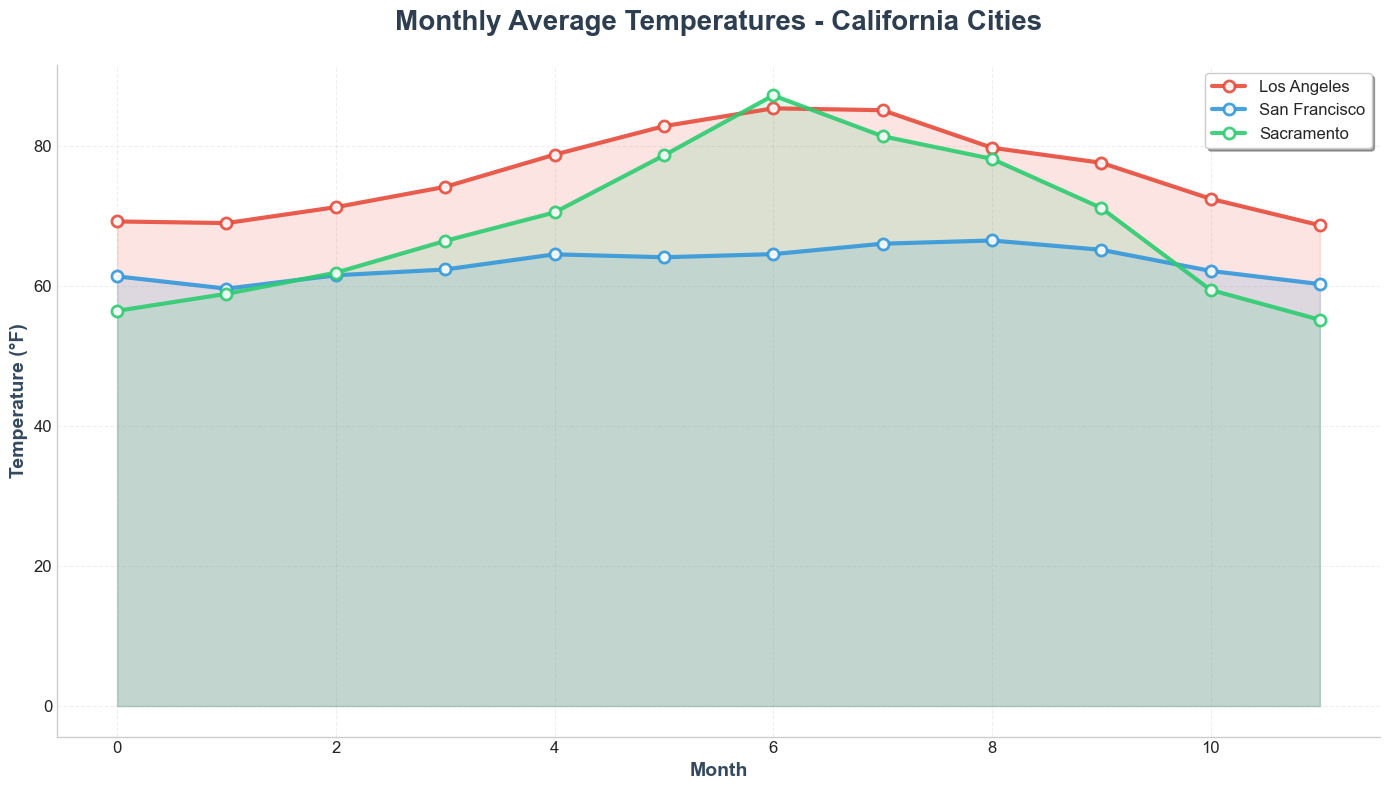

In [14]:
def plot_multiple_lines_professional(data_dict, title="Multiple Line Comparison"):
    '''
    Plot multiple lines with professional color gradients.
    
    Parameters:
        data_dict: Dictionary with labels as keys and data arrays as values
        title: Plot title
    '''
    fig, ax = plt.subplots(figsize=(14, 8), facecolor='white')
    ax.set_facecolor('white')
    
    # Professional color palette
    colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C']
    
    for idx, (label, values) in enumerate(data_dict.items()):
        x = np.arange(len(values))
        color = colors[idx % len(colors)]
        ax.plot(x, values, label=label, color=color, linewidth=3, 
                marker='o', markersize=8, markerfacecolor='white', 
                markeredgewidth=2, markeredgecolor=color, alpha=0.9)
        ax.fill_between(x, values, alpha=0.15, color=color)
    
    ax.set_title(title, fontsize=20, fontweight='bold', pad=25, color='#2C3E50')
    ax.set_xlabel('Month', fontsize=14, fontweight='bold', color='#34495E')
    ax.set_ylabel('Temperature (°F)', fontsize=14, fontweight='bold', color='#34495E')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    ax.legend(loc='best', frameon=True, fancybox=True, shadow=True, fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'Step3_MultipleLines.png'), dpi=150, bbox_inches='tight')
    plt.show()

# Sample data for three cities
LA = np.array([68, 70, 72, 75, 78, 82, 85, 84, 81, 76, 71, 68]) + np.random.normal(0, 1, 12)
SF = np.array([60, 61, 62, 63, 64, 65, 64, 65, 66, 65, 63, 61]) + np.random.normal(0, 0.8, 12)
Sac = np.array([55, 58, 62, 67, 73, 80, 85, 83, 78, 70, 61, 55]) + np.random.normal(0, 1.2, 12)

data = {"Los Angeles": LA, "San Francisco": SF, "Sacramento": Sac}
plot_multiple_lines_professional(data, title="Monthly Average Temperatures - California Cities")

## Step 4: Bar Chart with Color Gradients

Create a bar chart with gradient colors based on values

**Note:** The data used in this demo is synthetic and generated for demonstration purposes only.

C:\Users\15302\AppData\Local\Temp\ipykernel_43860\504901231.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=11)


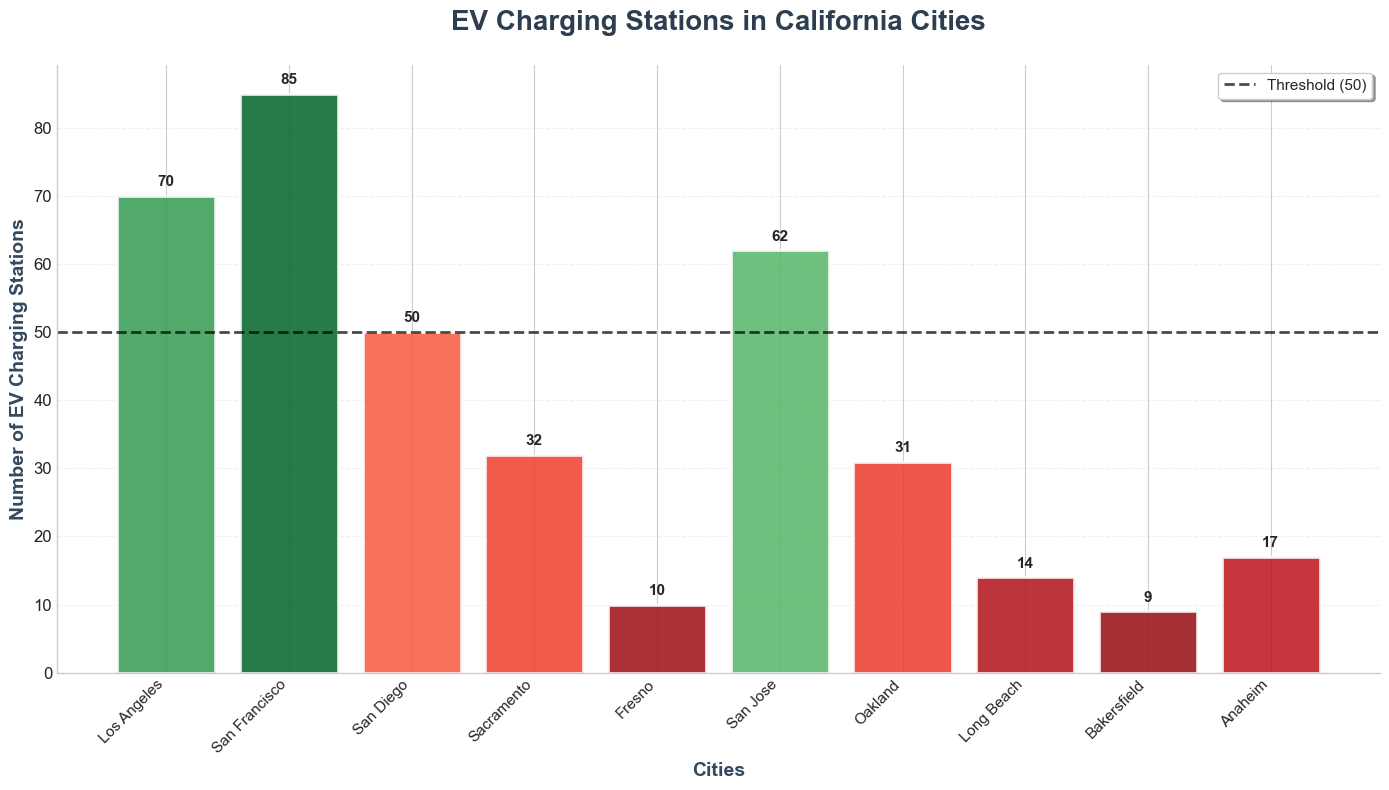

In [16]:
def plot_custom_bar_professional(data_dict, title="Custom Bar Chart", threshold=50):
    '''
    Create a professional bar chart with gradient colors.
    
    Parameters:
        data_dict: Dictionary with categories and values
        title: Plot title
        threshold: Value threshold for color differentiation
    '''
    categories = list(data_dict.keys())
    values = list(data_dict.values())
    
    # Create color gradient based on values
    # Small values = Red, Large values = Green
    colors = []
    min_val = min(values)
    max_val = max(values)
    for val in values:
        if val <= threshold:
            # Red gradient for low values (more red for smaller values)
            intensity = 1.0 - (val - min_val) / (threshold - min_val) if threshold > min_val else 0.5
            intensity = max(0.3, min(1.0, intensity))
            colors.append(plt.cm.Reds(0.4 + 0.5 * intensity))
        else:
            # Green gradient for high values (more green for larger values)
            intensity = (val - threshold) / (max_val - threshold) if max_val > threshold else 0.5
            intensity = max(0.3, min(1.0, intensity))
            colors.append(plt.cm.Greens(0.4 + 0.5 * intensity))
    
    fig, ax = plt.subplots(figsize=(14, 8), facecolor='white')
    ax.set_facecolor('white')
    
    bars = ax.bar(categories, values, color=colors, edgecolor='white', linewidth=2, alpha=0.85)
    
    # Add value labels on bars
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(val)}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Add threshold line
    ax.axhline(y=threshold, color='black', linestyle='--', linewidth=2, 
               label=f'Threshold ({threshold})', alpha=0.7)
    
    ax.set_title(title, fontsize=20, fontweight='bold', pad=25, color='#2C3E50')
    ax.set_xlabel('Cities', fontsize=14, fontweight='bold', color='#34495E')
    ax.set_ylabel('Number of EV Charging Stations', fontsize=14, fontweight='bold', color='#34495E')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=11)
    ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, fontsize=11)
    ax.grid(True, alpha=0.3, axis='y', linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'Step4_CustomBarChart.png'), dpi=150, bbox_inches='tight')
    plt.show()

# EV charging station data
cities = ['Los Angeles', 'San Francisco', 'San Diego', 'Sacramento', 'Fresno', 
          'San Jose', 'Oakland', 'Long Beach', 'Bakersfield', 'Anaheim']
n_station = [70, 85, 50, 32, 10, 62, 31, 14, 9, 17]
data = dict(zip(cities, n_station))

plot_custom_bar_professional(data, title='EV Charging Stations in California Cities', threshold=50)

## Step 5: Temperature Anomaly Detection Function

Create a function to find temperature anomalies and visualize them

In [17]:
def find_temperature_anomalies(years, temperatures):
    '''
    Find years with temperature anomalies (more than 2 standard deviations from mean).
    
    Parameters:
        years: Array of years
        temperatures: Array of temperatures
    
    Returns:
        Dictionary with anomaly years as keys and temperatures as values
    '''
    mean_temp = np.mean(temperatures)
    std_temp = np.std(temperatures)
    
    # Find anomalies (more than 2 std away from mean)
    threshold = 2 * std_temp
    anomaly_indices = np.where(np.abs(temperatures - mean_temp) > threshold)[0]
    
    anomaly_years = years[anomaly_indices]
    anomaly_values = temperatures[anomaly_indices]
    
    # Create dictionary using zip
    output = dict(zip(anomaly_years, anomaly_values))
    
    return output, mean_temp, std_temp

# Test the function
years = np.arange(2000, 2025)
temperatures = np.array([28.82, 22.00, 24.89, 31.20, 29.34, 10.11, 24.75, 19.24, 19.48, 22.05, 
                         20.72, 27.27, 23.81, 15.00, 22.22, 21.67, 27.47, 18.97, 35.00, 15.73, 
                         38.00, 23.27, 24.32, 16.29, 26.5])

anomalies, mean_temp, std_temp = find_temperature_anomalies(years, temperatures)
print(f"Mean Temperature: {mean_temp:.2f}°C")
print(f"Standard Deviation: {std_temp:.2f}°C")
print(f"\nTemperature Anomalies:")
for year, temp in anomalies.items():
    print(f"  {year}: {temp:.2f}°C")

Mean Temperature: 23.52°C
Standard Deviation: 6.14°C

Temperature Anomalies:
  2005: 10.11°C
  2020: 38.00°C


## Step 6: Visualize Temperature Anomalies

Create a professional plot highlighting temperature anomalies

**Note:** The data used in this demo is synthetic and generated for demonstration purposes only.

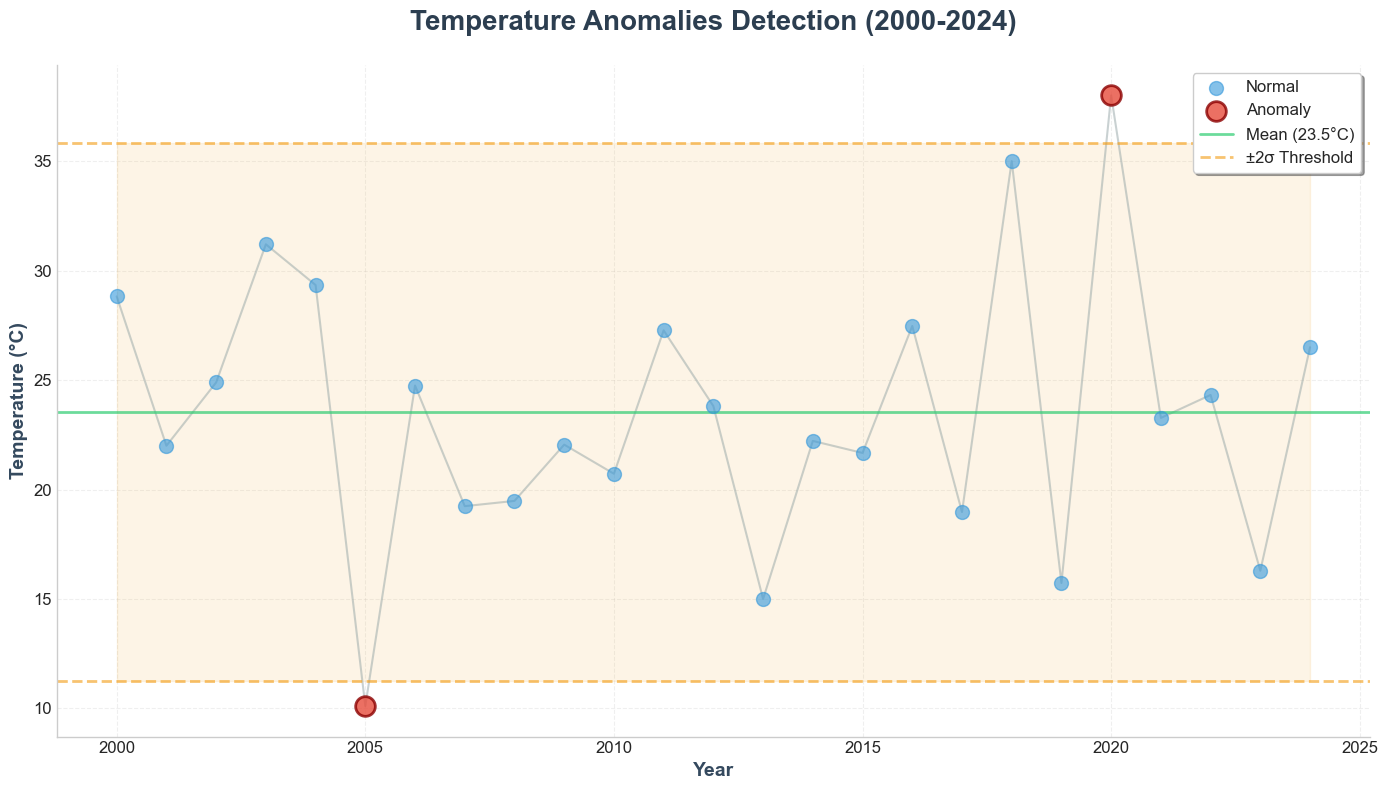

In [19]:
def plot_temperature_anomalies(years, temperatures, anomalies, mean_temp, std_temp):
    '''
    Visualize temperature data with anomalies highlighted.
    '''
    fig, ax = plt.subplots(figsize=(14, 8), facecolor='white')
    ax.set_facecolor('white')
    
    # Plot normal temperatures
    normal_mask = np.array([year not in anomalies for year in years])
    ax.scatter(years[normal_mask], temperatures[normal_mask], 
              color='#3498DB', s=100, alpha=0.6, label='Normal', zorder=3)
    
    # Plot anomalies
    anomaly_years = np.array(list(anomalies.keys()))
    anomaly_temps = np.array(list(anomalies.values()))
    ax.scatter(anomaly_years, anomaly_temps, 
              color='#E74C3C', s=200, alpha=0.8, label='Anomaly', 
              edgecolors='darkred', linewidths=2, zorder=4)
    
    # Add mean line
    ax.axhline(y=mean_temp, color='#2ECC71', linestyle='-', linewidth=2, 
               label=f'Mean ({mean_temp:.1f}°C)', alpha=0.7)
    
    # Add threshold bands
    ax.axhline(y=mean_temp + 2*std_temp, color='#F39C12', linestyle='--', 
               linewidth=2, label=f'±2σ Threshold', alpha=0.6)
    ax.axhline(y=mean_temp - 2*std_temp, color='#F39C12', linestyle='--', 
               linewidth=2, alpha=0.6)
    ax.fill_between(years, mean_temp - 2*std_temp, mean_temp + 2*std_temp, 
                    alpha=0.1, color='#F39C12')
    
    # Connect points with line
    ax.plot(years, temperatures, color='#95A5A6', linewidth=1.5, alpha=0.5, zorder=1)
    
    ax.set_title('Temperature Anomalies Detection (2000-2024)', 
                fontsize=20, fontweight='bold', pad=25, color='#2C3E50')
    ax.set_xlabel('Year', fontsize=14, fontweight='bold', color='#34495E')
    ax.set_ylabel('Temperature (°C)', fontsize=14, fontweight='bold', color='#34495E')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'Step6_TemperatureAnomalies.png'), dpi=150, bbox_inches='tight')
    plt.show()

# Visualize anomalies
plot_temperature_anomalies(years, temperatures, anomalies, mean_temp, std_temp)

## Step 7: NDVI Spatial Distribution Map

Create a professional NDVI (Normalized Difference Vegetation Index) map for remote sensing and GIS analysis.
NDVI is a key indicator of vegetation health, density, and biomass.

**Note:** The data used in this demo is synthetic and generated for demonstration purposes only.

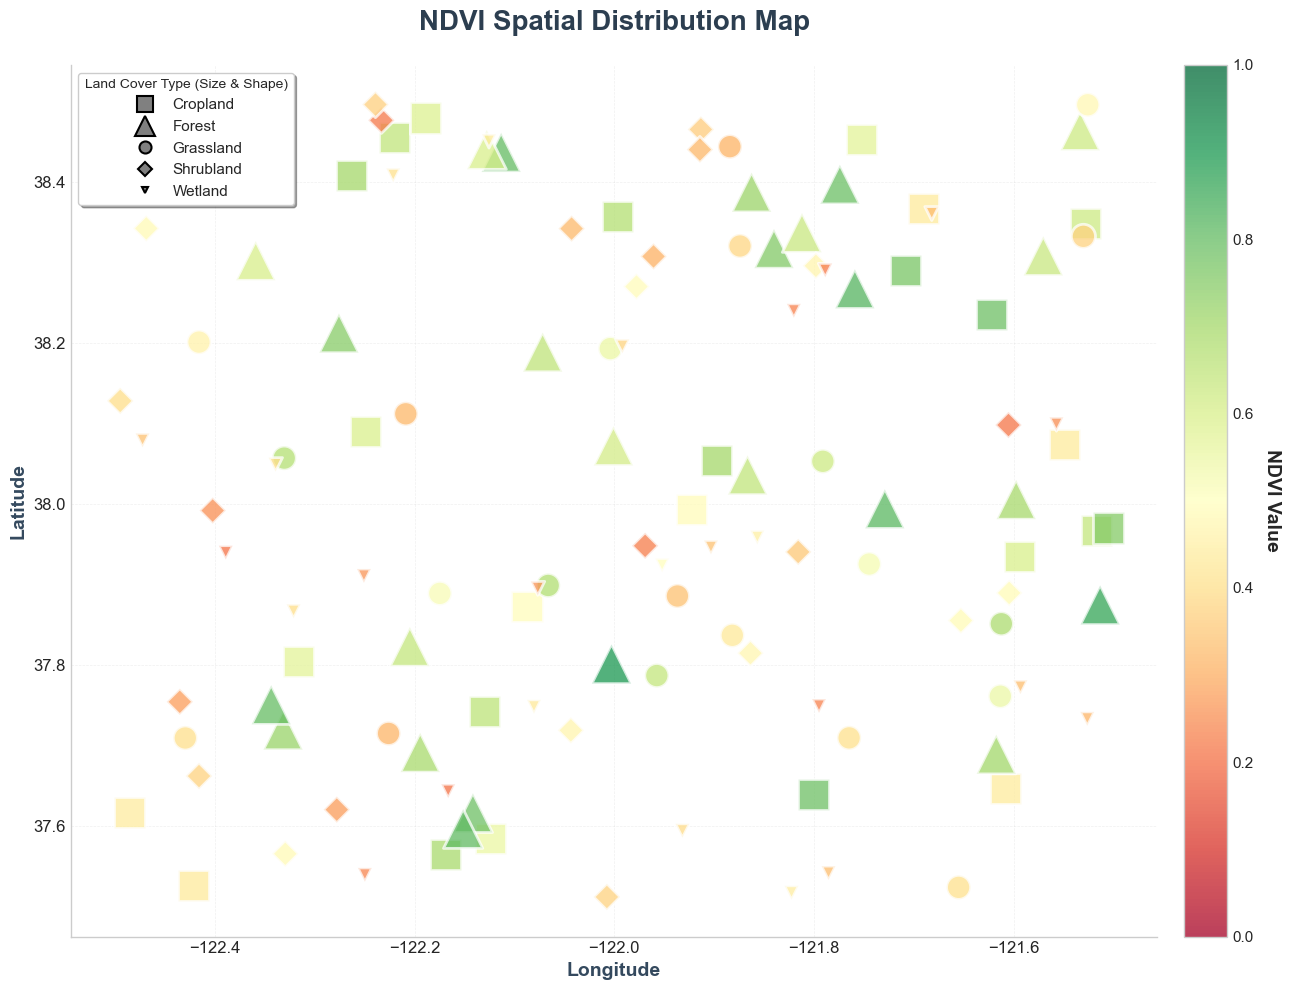

In [33]:
def plot_ndvi_spatial_map(data, title='NDVI Spatial Distribution Map'):
    '''
    Create a professional NDVI (Normalized Difference Vegetation Index) spatial distribution map.
    NDVI is a key remote sensing index used to assess vegetation health and density.
    
    Parameters:
        data: List of tuples (longitude, latitude, land_cover_type, ndvi_value)
        title: Plot title
    '''
    longitudes = [point[0] for point in data]
    latitudes = [point[1] for point in data]
    land_cover_types = [point[2] for point in data]
    ndvi_values = [point[3] for point in data]
    
    fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
    ax.set_facecolor('white')
    
    # Define point sizes and marker shapes for different land cover types
    # Dramatic size differences for clear visibility
    land_cover_sizes = {
        'Forest': 800,        # Largest - dense canopy
        'Cropland': 500,      # Large - agricultural fields
        'Grassland': 300,     # Medium - grass coverage
        'Shrubland': 180,     # Small - sparse shrubs
        'Wetland': 100         # Smallest - water/vegetation mix
    }
    
    # Different marker shapes for each land cover type
    land_cover_markers = {
        'Forest': '^',         # Triangle - trees
        'Cropland': 's',      # Square - fields
        'Grassland': 'o',     # Circle - grass
        'Shrubland': 'D',     # Diamond - shrubs
        'Wetland': 'v'        # Inverted triangle - water
    }
    
    # Plot each land cover type separately with different sizes and shapes
    # Color represents NDVI value, size and shape represent land cover type
    unique_types = sorted(list(set(land_cover_types)))
    scatter_objects = []
    
    for lc_type in unique_types:
        indices = [i for i, v in enumerate(land_cover_types) if v == lc_type]
        if indices:
            lon_subset = [longitudes[i] for i in indices]
            lat_subset = [latitudes[i] for i in indices]
            ndvi_subset = [ndvi_values[i] for i in indices]
            size = land_cover_sizes.get(lc_type, 200)
            marker = land_cover_markers.get(lc_type, 'o')
            
            # Color by NDVI, size and shape by land cover type
            scatter = ax.scatter(lon_subset, lat_subset, c=ndvi_subset, s=size,
                              marker=marker, cmap='RdYlGn', vmin=0, vmax=1, alpha=0.75,
                              edgecolors='white', linewidths=2, zorder=3,
                              label=lc_type)
            scatter_objects.append(scatter)
    
    # Add colorbar for NDVI values
    cbar = plt.colorbar(scatter_objects[0], ax=ax, pad=0.02)
    cbar.set_label('NDVI Value', fontsize=14, fontweight='bold', rotation=270, labelpad=20)
    cbar.ax.tick_params(labelsize=11)
    
    # Create legend for land cover types showing different sizes and shapes
    legend_elements = []
    for lc_type in unique_types:
        size = land_cover_sizes.get(lc_type, 200)
        marker = land_cover_markers.get(lc_type, 'o')
        # Create marker with appropriate size and shape for legend
        # markersize is in points, scale from scatter size (pixels^2) to points
        legend_markersize = np.sqrt(size) / 2.0
        legend_elements.append(plt.Line2D([0], [0], marker=marker, color='w', 
                                          markersize=legend_markersize, 
                                          markerfacecolor='#808080',
                                          markeredgecolor='black', markeredgewidth=1.5,
                                          label=lc_type, linestyle='None'))
    
    ax.legend(handles=legend_elements, loc='upper left', frameon=True, 
             fancybox=True, shadow=True, fontsize=11, title='Land Cover Type (Size & Shape)')
    
    ax.set_title(title, fontsize=20, fontweight='bold', pad=25, color='#2C3E50')
    ax.set_xlabel('Longitude', fontsize=14, fontweight='bold', color='#34495E')
    ax.set_ylabel('Latitude', fontsize=14, fontweight='bold', color='#34495E')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'Step7_GISScatterPlot.png'), dpi=150, bbox_inches='tight')
    plt.show()

# Generate sample NDVI data for remote sensing/GIS analysis
# NDVI values: -1 to +1, where >0.3 indicates vegetation, >0.6 indicates dense vegetation
np.random.seed(42)
data = []
land_cover_types = ['Forest', 'Grassland', 'Wetland', 'Shrubland', 'Cropland']

# NDVI ranges by land cover type
ndvi_ranges = {
    'Forest': (0.6, 0.9),      # Dense vegetation
    'Grassland': (0.3, 0.7),   # Moderate vegetation
    'Wetland': (0.2, 0.5),     # Sparse vegetation
    'Shrubland': (0.2, 0.5),   # Sparse vegetation
    'Cropland': (0.4, 0.8)     # Variable vegetation
}

for i in range(120):
    lon = np.random.uniform(-122.5, -121.5)  # Longitude range
    lat = np.random.uniform(37.5, 38.5)       # Latitude range
    lc_type = np.random.choice(land_cover_types)
    ndvi_min, ndvi_max = ndvi_ranges[lc_type]
    ndvi = np.random.uniform(ndvi_min, ndvi_max)
    data.append((lon, lat, lc_type, ndvi))

plot_ndvi_spatial_map(data, title='NDVI Spatial Distribution Map')

## Step 8: Vibrant Heatmap

Create a stunning heatmap for spatial data visualization

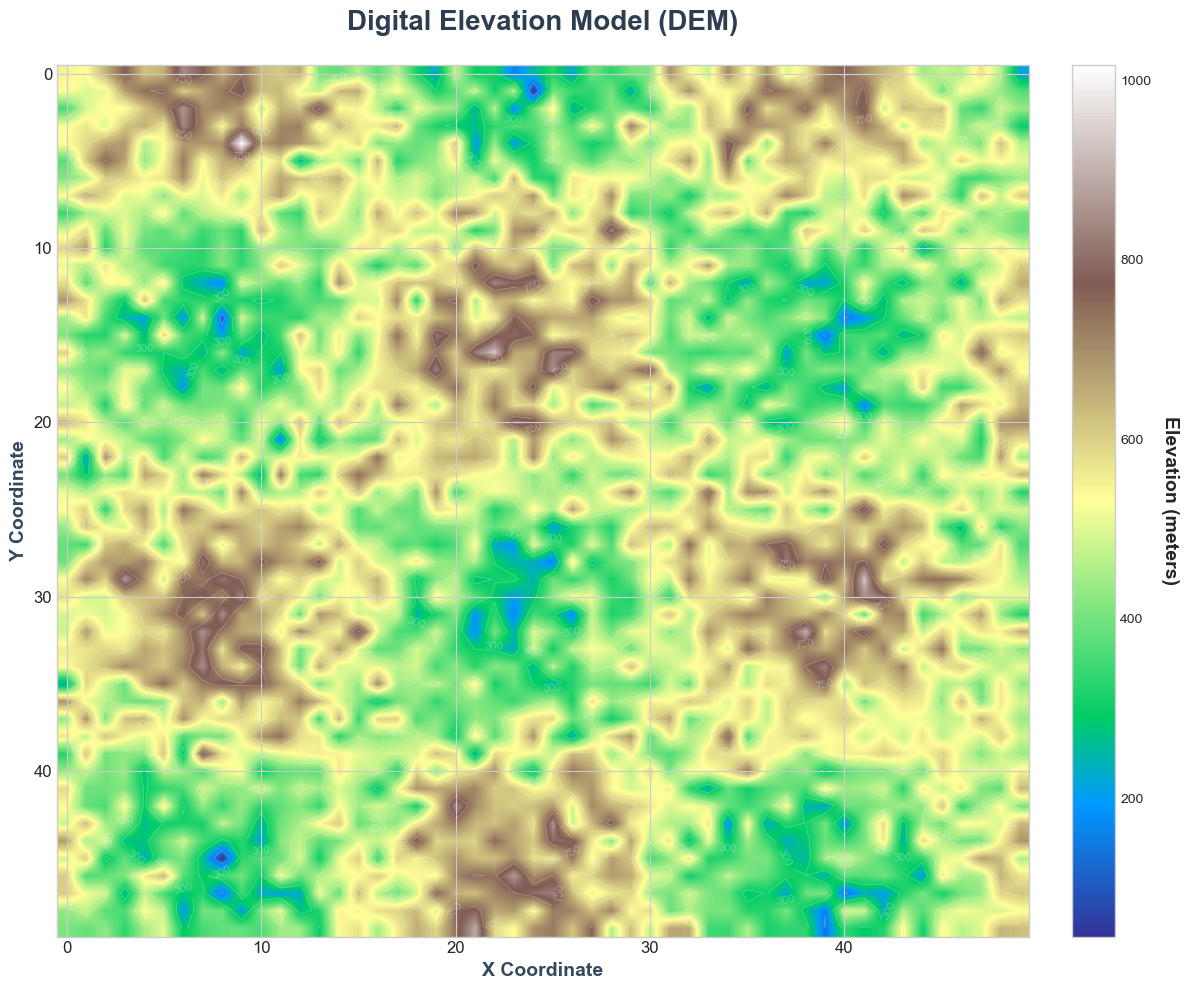

In [23]:
def plot_heatmap_professional(data, cmap='plasma', title='Elevation Heatmap'):
    '''
    Create a professional heatmap visualization.
    
    Parameters:
        data: 2D array of values
        cmap: Colormap name
        title: Plot title
    '''
    fig, ax = plt.subplots(figsize=(12, 10), facecolor='white')
    ax.set_facecolor('white')
    
    # Create heatmap
    im = ax.imshow(data, cmap=cmap, interpolation='bilinear', aspect='auto')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Elevation (meters)', fontsize=14, fontweight='bold', rotation=270, labelpad=20)
    
    # Add contour lines for better visualization
    contours = ax.contour(data, colors='white', alpha=0.3, linewidths=0.5)
    ax.clabel(contours, inline=True, fontsize=8, fmt='%d')
    
    ax.set_title(title, fontsize=20, fontweight='bold', pad=25, color='#2C3E50')
    ax.set_xlabel('X Coordinate', fontsize=14, fontweight='bold', color='#34495E')
    ax.set_ylabel('Y Coordinate', fontsize=14, fontweight='bold', color='#34495E')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    
    plt.tight_layout()
    plt.savefig(os.path.join(images_dir, 'Step8_Heatmap.png'), dpi=150, bbox_inches='tight')
    plt.show()

# Generate sample elevation data
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = np.linspace(0, 10, 50)
X, Y = np.meshgrid(x, y)

# Create interesting elevation pattern
elevation = 500 + 200 * np.sin(X) * np.cos(Y) + 100 * np.random.randn(50, 50)

plot_heatmap_professional(elevation, cmap='terrain', title='Digital Elevation Model (DEM)')

## Step 9: Summary - All Plot Types Together

Create a professional summary visualization combining multiple plot types

**Note:** All data used in this demo is synthetic and generated for demonstration purposes only.

C:\Users\15302\AppData\Local\Temp\ipykernel_43860\143892044.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)


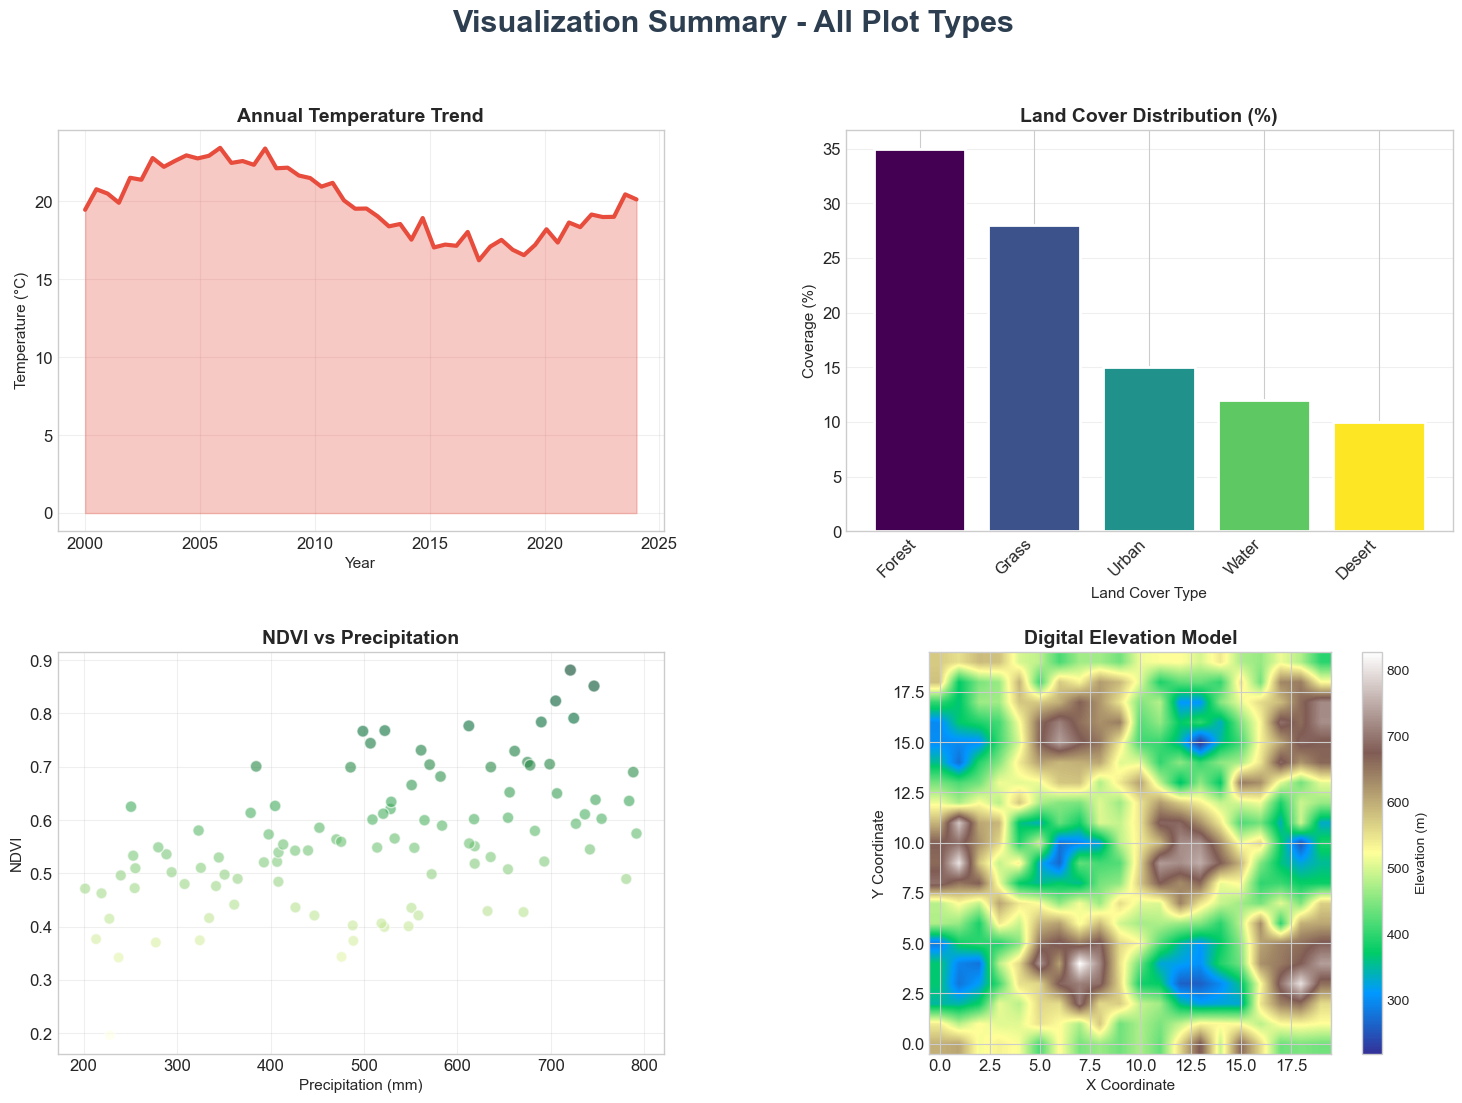


✅ All visualizations created successfully!
📁 Images saved to: c:\mnarimani\1-UCDavis\9-Github\ABT182_Advance_GIS_UCDavis\code\colab\Week4\Demo\Images
⚠️  Note: All data used in this demo is synthetic and generated for demonstration purposes.


In [28]:
fig = plt.figure(figsize=(18, 12), facecolor='white')

# Create a 2x2 grid
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Plot 1: Temperature trend (Environmental)
ax1 = fig.add_subplot(gs[0, 0])
x = np.linspace(2000, 2024, 50)
y = 20 + 3 * np.sin((x - 2000) * np.pi / 12) + 0.5 * np.random.randn(50)
ax1.plot(x, y, color='#E74C3C', linewidth=3)
ax1.fill_between(x, y, alpha=0.3, color='#E74C3C')
ax1.set_title('Annual Temperature Trend', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('Temperature (°C)', fontsize=11)
ax1.set_facecolor('white')
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Land cover types (GIS/Remote Sensing)
ax2 = fig.add_subplot(gs[0, 1])
categories = ['Forest', 'Grass', 'Urban', 'Water', 'Desert']
values = [35, 28, 15, 12, 10]
colors_bar = plt.cm.viridis(np.linspace(0, 1, len(categories)))
ax2.bar(categories, values, color=colors_bar, edgecolor='white', linewidth=2)
ax2.set_title('Land Cover Distribution (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Land Cover Type', fontsize=11)
ax2.set_ylabel('Coverage (%)', fontsize=11)
ax2.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)
ax2.set_facecolor('white')
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='minor', labelsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: NDVI vs Precipitation (Remote Sensing/GIS)
ax3 = fig.add_subplot(gs[1, 0])
x_scatter = np.random.uniform(200, 800, 100)  # Precipitation (mm)
y_scatter = 0.3 + 0.0005 * x_scatter + np.random.normal(0, 0.1, 100)  # NDVI
y_scatter = np.clip(y_scatter, 0, 1)  # NDVI range [0, 1]
colors_scatter = y_scatter  # Color by NDVI value
sizes = 50 + 30 * y_scatter
ax3.scatter(x_scatter, y_scatter, c=colors_scatter, s=sizes, 
           alpha=0.6, cmap='YlGn', edgecolors='white', linewidths=1)
ax3.set_title('NDVI vs Precipitation', fontsize=14, fontweight='bold')
ax3.set_xlabel('Precipitation (mm)', fontsize=11)
ax3.set_ylabel('NDVI', fontsize=11)
ax3.set_facecolor('white')
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='minor', labelsize=10)
ax3.grid(True, alpha=0.3)

# Plot 4: Elevation heatmap (GIS/Remote Sensing)
ax4 = fig.add_subplot(gs[1, 1])
x_elev = np.linspace(-5, 5, 20)
y_elev = np.linspace(-5, 5, 20)
X_elev, Y_elev = np.meshgrid(x_elev, y_elev)
data_heat = 500 + 200 * np.sin(X_elev) * np.cos(Y_elev) + 50 * np.random.randn(20, 20)
im = ax4.imshow(data_heat, cmap='terrain', interpolation='bilinear', origin='lower')
cbar = plt.colorbar(im, ax=ax4)
cbar.set_label('Elevation (m)', fontsize=10)
ax4.set_title('Digital Elevation Model', fontsize=14, fontweight='bold')
ax4.set_xlabel('X Coordinate', fontsize=11)
ax4.set_ylabel('Y Coordinate', fontsize=11)
ax4.set_facecolor('white')
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.tick_params(axis='both', which='minor', labelsize=10)

fig.suptitle('Visualization Summary - All Plot Types', 
             fontsize=22, fontweight='bold', y=0.98, color='#2C3E50')

plt.savefig(os.path.join(images_dir, 'Step9_SummaryAllPlots.png'), dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ All visualizations created successfully!")
print(f"📁 Images saved to: {os.path.abspath(images_dir)}")
print("⚠️  Note: All data used in this demo is synthetic and generated for demonstration purposes.")